# Maximum Likelihood Estimation

## Probability distribution case

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(1000,)


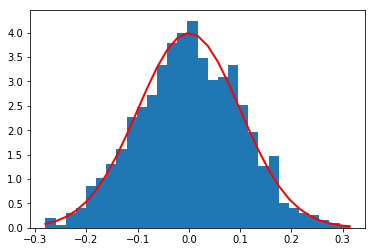

In [2]:
mu, sigma = 0, 0.1 # true mean and standard deviation
data = np.random.normal(mu, sigma, 1000)
print(data.shape)

count, bins, ignored = plt.hist(data, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [3]:
from UQpy.Inference import Model
candidate_model = Model(model_type = 'pdf', model_name='normal')

In [4]:
from UQpy.Inference import MLEstimation
ml_estimator = MLEstimation(model_instance=candidate_model, data=data)
print('ML estimates of the mean={0:.3f} and std. dev={1:.3f}'.format(ml_estimator.param[0], ml_estimator.param[1]))

Evaluating max likelihood estimate...
ML estimates of the mean=0.002 and std. dev=0.100


## Regression model (model linear in the parameters)

In [5]:
# Generate data
from scipy.stats import multivariate_normal

param_true = np.array([1.0, 2.0]).reshape(1, -1)
error_covariance = np.eye(50)

print(param_true.shape)
from UQpy.RunModel import RunModel
z = RunModel(samples=param_true, model_type='python', model_script='pfn_quadratic.py')

data = z.model_eval.QOI[0]+multivariate_normal.rvs(mean=None, cov=error_covariance, size=1)
print(data)

(1, 2)

Evaluating the model...

[ -1.37335844  -0.98400862   0.49841554   0.75789837   2.41312595
   2.97935164   3.28640781   6.03482824   6.85484265   8.41037739
  11.13712447  11.4345486   14.28131193  14.21847418  19.57766927
  22.3954177   25.28195611  26.83171553  30.8491537   36.2202242
  36.85136218  41.08185777  46.3493699   50.03071519  53.14208377
  57.1417264   60.75846811  66.44867391  72.59949898  77.32294088
  79.94793879  85.81363635  93.03531771  99.28891127 103.49941218
 109.0491857  115.20784562 122.65632677 129.58080899 133.93568627
 139.8974693  148.18165956 155.61639074 162.02398222 170.75480124
 177.22255712 185.82199603 190.90959846 199.82709663 209.44595683]


In [6]:
candidate_model = Model(model_type='python', model_script='pfn_quadratic.py', n_params=2, 
                        error_covariance=error_covariance)

In [7]:
ml_estimator = MLEstimation(model_instance=candidate_model, data=data)

Evaluating max likelihood estimate...
Optimization terminated successfully.
         Current function value: 70.449961
         Iterations: 113
         Function evaluations: 218


In [8]:
print(ml_estimator.param)

[1.20884384 1.97113465]
